<a href="https://colab.research.google.com/github/Bross-DataScience/Normalizarion_PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

#### DataSet Iris

In [87]:
iris = datasets.load_iris()

In [7]:
type(iris)

sklearn.utils.Bunch

In [9]:
X = iris['data']
Y = iris['target']

In [10]:
X.shape, Y.shape

((150, 4), (150,))

In [11]:
X = StandardScaler().fit_transform(X)

In [14]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
pd.DataFrame(X, columns=iris['feature_names']).head()  # não será utilizado, somente para burlar

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [16]:
pca = PCA(n_components=2)

In [17]:
X.shape

(150, 4)

In [18]:
pc = pca.fit_transform(X)

In [19]:
pc.shape

(150, 2)

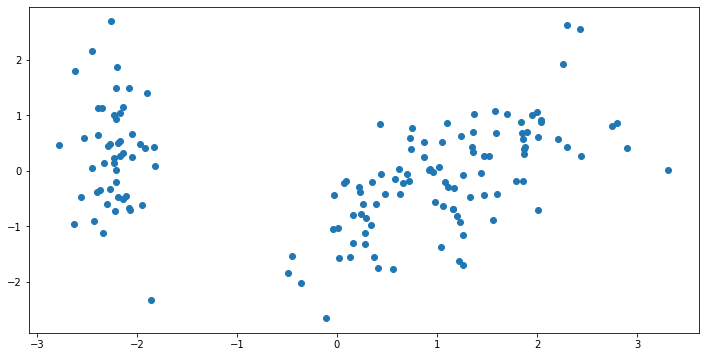

In [43]:
plt.figure(figsize=(12, 6))
plt.scatter(pc[:,0], pc[:,1])
plt.show()

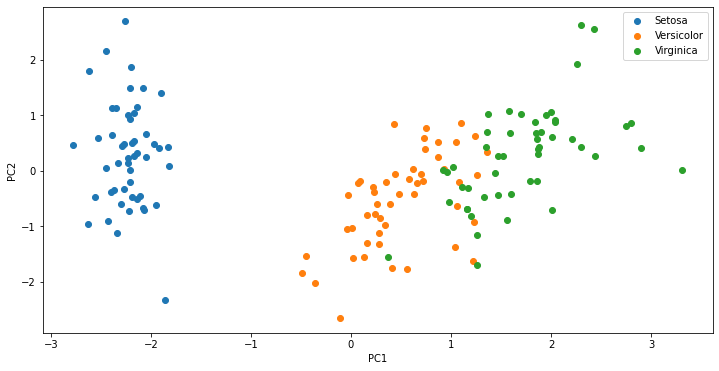

In [42]:
plt.figure(figsize=(12, 6))
plt.scatter(pc[Y==0, 0], pc[Y==0, 1], label='Setosa')
plt.scatter(pc[Y==1, 0], pc[Y==1, 1],  label='Versicolor')
plt.scatter(pc[Y==2, 0], pc[Y==2, 1],  label='Virginica') 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [34]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [35]:
sum(pca.explained_variance_ratio_)

0.9581320720000165

#### DataSet Digitos

In [38]:
digits = datasets.load_digits()
X_d = digits['data']
Y_d = digits['target']

In [39]:
X_d.shape, Y_d.shape

((1797, 64), (1797,))

Projetando 64D em apenas 2D


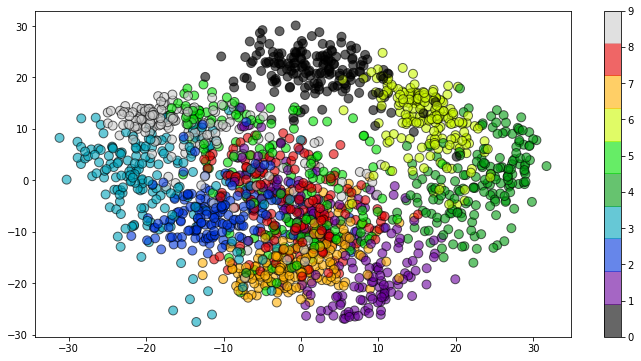

In [51]:
pca = PCA(n_components=2)
X_reduzido = pca.fit_transform(X_d) # fit_transform é uma maneira de normalizar (transform) e adequar(fit) no mesmo comando. Portanto, substitui o StandardScaleR()

print(f'Projetando {X_d.shape[1]}D em apenas 2D')

plt.figure(figsize=(12, 6))
plt.scatter(X_reduzido[:,0], X_reduzido[:,1],
            c=Y_d, edgecolor='black', alpha=0.6, s=80,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

#### PCA Integridade

In [52]:
X_d.shape

(1797, 64)

In [82]:
pca = PCA(0.90)

In [83]:
pca.fit(X_d)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [84]:
pca.n_components_

21

In [85]:
np.arange(1, pca.n_components_+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

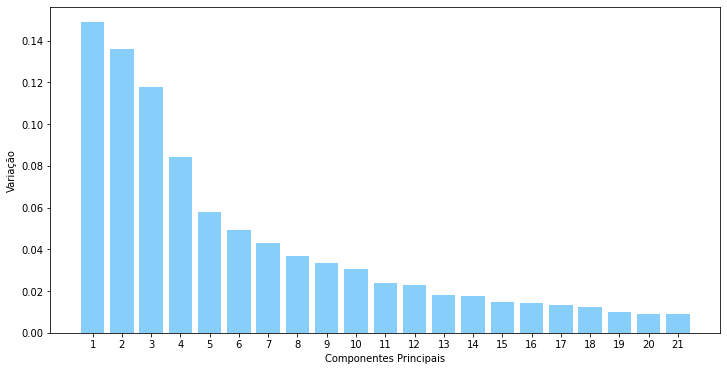

In [86]:
plt.figure(figsize=(12,6))
plt.bar(np.arange(1, pca.n_components_+1), pca.explained_variance_ratio_[:pca.n_components_], color='lightskyblue')
plt.xlabel('Componentes Principais')
plt.ylabel('Variação')
plt.xticks(np.arange(1, pca.n_components_+1))
plt.show()